<h1> ML Assignment 1</h1>

<h2>Task 1: EDA</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('titanic3.xls')

#show the first 5 rows of the dataframe
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


- The summary of columns and data types tell us that that later on in the pipeline, we're going to have to handle some missing values (for the cabin and body columns per example).
- The cabin column has 1014 missing values, however it is likely not so useful for analysis.
- Some data types are object (categorical variables) such as sex, which we are going to have to encode later on.

In [3]:
print(df.info())  # Summary of columns, data types, and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [4]:
print(df.describe())  # Count, mean, std, min, max, quartiles


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In this summary of numerical variables, we can notice that:
 - The mean of survival is only 38% and the median (50% range) is 0, therefore unfortunately more people died than     survived.
 - The class variable has a mean of 2.29, indicating that most people on the titanic were in 3rd class.
 - Most of the fares were in between 7.89 and 31.27 (most people were in 2nd and 3rd class), while a minority of people paid way higher since the mean is 33.29 and the highest fare paid is 512.32 (pushes us to think if people who paid higher prices (better class) had better chances at survival).
 - Most people traveled alone without siblings/spouses or parents/children, however the max for these two variables are 8 and 9, meaning some people had large families with them (more difficult for them to survive?).



In [5]:
print(df.describe(include=['object']))  # Summary of categorical columns


                        name   sex    ticket        cabin embarked boat  \
count                   1309  1309      1309          295     1307  486   
unique                  1307     2       939          186        3   28   
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S   13   
freq                       2   843        11            6      914   39   

           home.dest  
count            745  
unique           369  
top     New York, NY  
freq              64  


In this summary of categorical variables, we can notice that:
- Most passengers were males (843 males) which could have an impact on survival rate.
- 11 passengers shared the same ticket (C.A. 2343) indicating they're together (same family or friend group) which might have made it harder for them to survive.

In [6]:
print(df.isnull().sum())  # Count missing values per column


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


For some columns, so many values are missing and we are going to either fill in the missing values using methods or by dropping some useless columns.

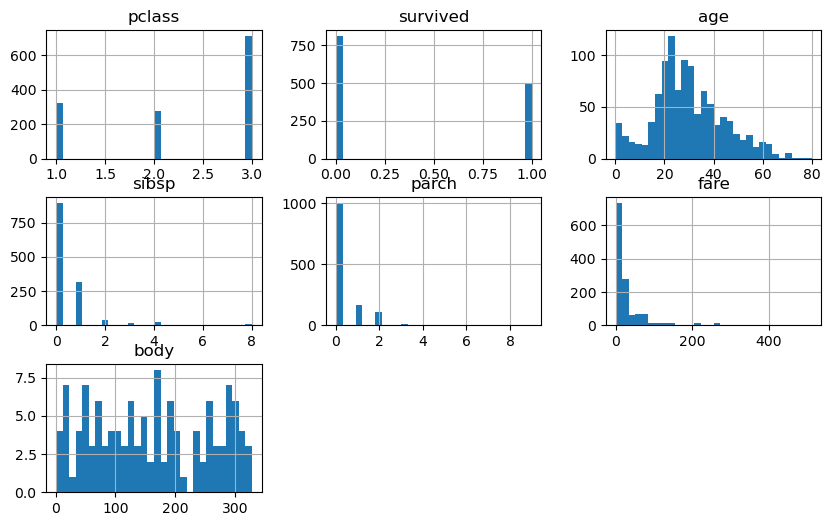

In [7]:
df.hist(figsize=(10, 6), bins=30)
plt.show()


These histograms visualizes the summary of the numerical variables.

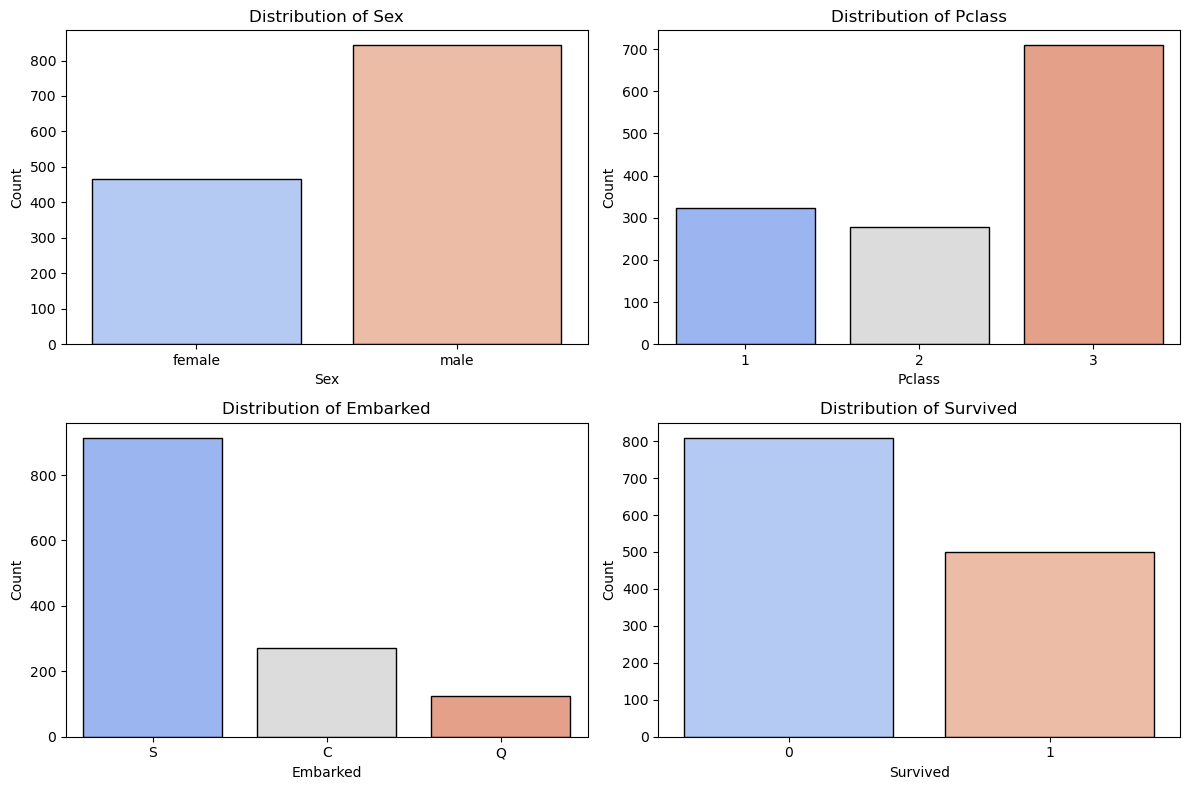

In [8]:
# Count plots for categorical variables
categorical_cols = ['sex', 'pclass', 'embarked', 'survived']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], palette='coolwarm', edgecolor='black')
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


These bar plots visualize the summary of the categorical variables.

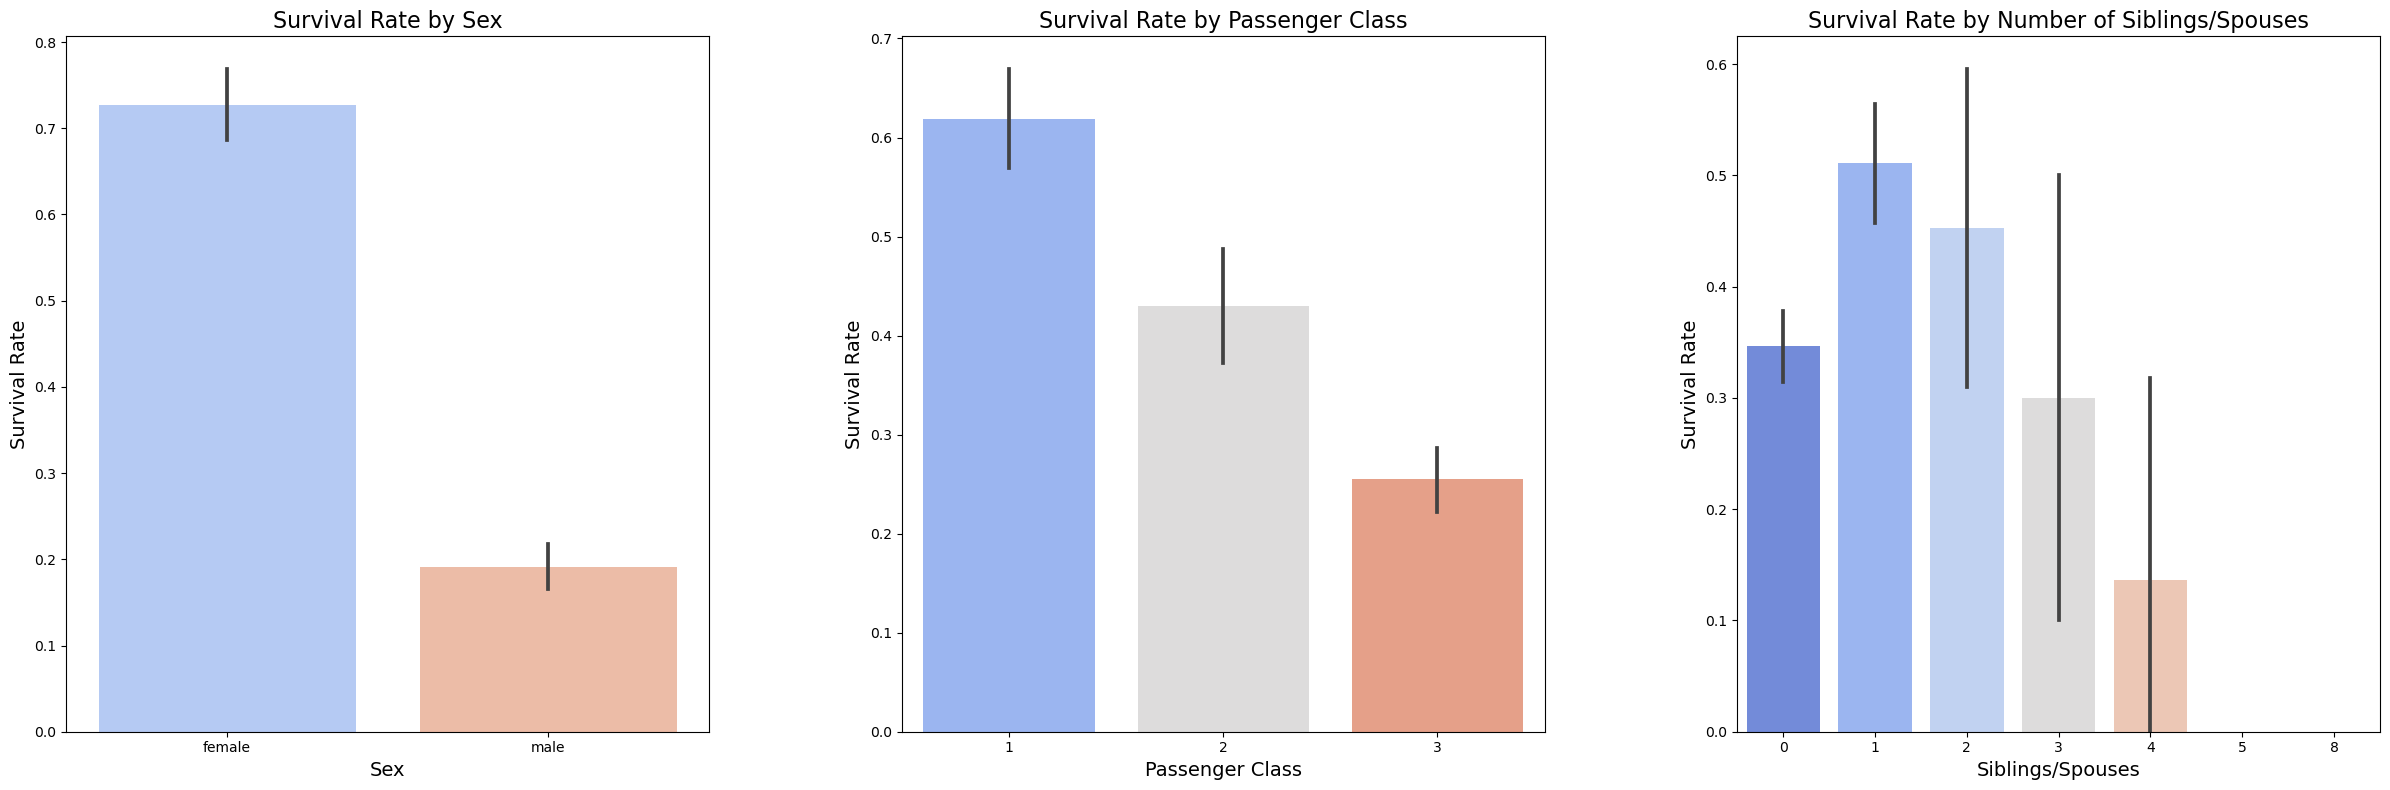

In [9]:
plt.figure(figsize=(24, 8))  # Bigger figure to improve readability

# Survival by sex
plt.subplot(1, 3, 1)
sns.barplot(x="sex", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Sex", fontsize=16)  # Increase title font size
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Sex", fontsize=14)

# Survival by class
plt.subplot(1, 3, 2)
sns.barplot(x="pclass", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class", fontsize=16)
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Passenger Class", fontsize=14)

# Survival rate by number of siblings/spouses
plt.subplot(1, 3, 3)
sns.barplot(x="sibsp", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Number of Siblings/Spouses", fontsize=16)
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Siblings/Spouses", fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add spacing between subplots
plt.show()



- The first plot shows us that females had a way better chance of survival (72%) than men (20%).
- Second plot shows us that the better of a class you had (1st class), the better of a chance you had at survival.
- Third plot shows us that large families had way lower chances at survival than people with one family member. Those who had 0 family members aboard had a lower chance at survival than those with 1 or 2 family members, perhaps they had no one to help them escape.

These plots validate our previous doubts about the correlations between survival and the variables in subject.


<h2>Task 2: Managing Missing Values</h2>

In [10]:
print(df.isnull().sum())  # Count missing values per column

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


As we can see:
- Column 'age' has 263 missing values.
- Column 'fare' has only 1 missing value.
- Column 'cabin' has 1014 missing values.
- Column 'embarked' has 2 missing values.
- Column 'boat' has 823 missing values.
- Column 'body' has 1188 missing values.
- Column 'home.dest' has 564 missing values.

<h3>Age Column</h3>
Since the age of a passenger is important to predict wether they survived or not, we have to fill the missing values. The distribution of ages is right-skewed, therefore the median would be a better measure (than the mean) of the missing values. However, to be more precise, we are gonna use the grouped median based on the class and gender. That is because it is more probable that the wealthier passengers in 1st class were older men and women while the 3rd class passengers were young men.

The code to handle that:

In [11]:
df["age"].fillna(df.groupby(["pclass", "sex"])["age"].transform("median"), inplace=True)


<h3>Fare Column</h3>

Since there is only one missing value for this column, then the best thing to do is to replace it by the median of the passenger's class.

The code to handle that:

In [12]:
df["fare"].fillna(df.groupby("pclass")["fare"].transform("median"), inplace=True)


<h3>Cabin Column</h3>

For this feature, we can see that a lot of values are missing, so it would be better to just transform the whole column into a binary "Has a Cabin" feature. Most people back in the day, were not assigned cabins if they were in third class, so having a cabin or not, is in direct relationship with wether the passenger is wealthy or not (which has a correlation with survival).

This code will transform all missing values into a False boolean value (0) indicating they did not have a cabin:


In [13]:
df["has_cabin"] = df["cabin"].notna().astype(int)
df.drop(columns=["cabin"], inplace=True)


<h3>Embarked Column</h3>

We only have 2 missing values, so we are going to replace them with the most frequent port of embarkation which is Southhampton ("S").

Code to handle that:


In [14]:
df["embarked"].fillna("S", inplace=True)


<h3>Boat and Body Columns</h3>

These 2 columns should be dropped as they are useless because:
- The boat column refers to a lifeboat for survivors, therefore if the passenger isn't assigned a boat, then he did not survive.
- The body column refers to dead bodies found, therefore if the passenger is assigned one, then they did not survive.

These 2 columns indirectly leak survival information.

Code to handle that:


In [15]:
df.drop(columns=["boat", "body"], inplace=True)


<h3>Home Destination Column</h3>

This column has a lot of missing values (43%) and this feature does not help predict the survival of a passenger, therefore it will also be dropped.

The code to handle that:


In [16]:
df.drop(columns=["home.dest"], inplace=True)


<h2>Task 3: Encoding Categorical Variables</h2>

We start by dropping the name and ticket columns because they are useless for predicting survival:

In [17]:
df.drop(columns=["name", "ticket"], inplace=True)

The cabin column was previously transformed into a new binary feature.

We are going to apply One-Hot Encoding to sex and embarked:
- 'sex' becomes "sex_male" (0 = female, 1 = male).
- 'embarked' becomes "embarked_C", "embarked_Q", "embarked_S" (dummy variables). For example if a passenger embarked at Southampton then embarked_S = 1 and it is 0 elsewhere.

Code to apply the One-Hot Encoding, convert the encoded features into a dataframe and merge it with the original one:

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop="first")  # drop="first" avoids multicollinearity
encoded_data = encoder.fit_transform(df[["sex", "embarked"]])

# Convert encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["sex", "embarked"]))

# Merge encoded features into original DataFrame
df_encoded = df.drop(columns=["sex", "embarked"]).reset_index(drop=True)
df_final = pd.concat([df_encoded, encoded_df], axis=1)

# Display transformed dataset
print(df_final.head())

   pclass  survived      age  sibsp  parch      fare  has_cabin  sex_male  \
0       1         1  29.0000      0      0  211.3375          1       0.0   
1       1         1   0.9167      1      2  151.5500          1       1.0   
2       1         0   2.0000      1      2  151.5500          1       0.0   
3       1         0  30.0000      1      2  151.5500          1       1.0   
4       1         0  25.0000      1      2  151.5500          1       0.0   

   embarked_Q  embarked_S  
0         0.0         1.0  
1         0.0         1.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  


/Users/jad/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Since ML Models don't understand categorical variables such as "male" or "female" then we need to transform them into numbers. Now, if a passenger is a male, then the new encoded feature will have the value 1, indicating to the ML Model that the passenger is a male.

"embarked" is converted into two columns (embarked_Q, embarked_S), the third column (embarked_C) is removed to prevent redundancy. If we have for a certain passenger embarked_Q, embarked_S = 0, then we know for sure that embarked_C = 1 for sure.

Our machine learning model can now use these numerical values to find patterns in the data.

<h2>Task 4: Feature Scaling</h2>


In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standardization (mean=0, std=1)
standardized_data = standard_scaler.fit_transform(df[numerical_cols])
standardized_df = pd.DataFrame(standardized_data, columns=[f"{col}_standardized" for col in numerical_cols])

# Apply Normalization (values between 0 and 1)
normalized_data = minmax_scaler.fit_transform(df[numerical_cols])
normalized_df = pd.DataFrame(normalized_data, columns=[f"{col}_normalized" for col in numerical_cols])

# Display the first few rows
print("Standardized Data:\n", standardized_df.head())
print("\nNormalized Data:\n", normalized_df.head())

Standardized Data:
    pclass_standardized  survived_standardized  age_standardized  \
0            -1.546098               1.272006         -0.019783   
1            -1.546098               1.272006         -2.145175   
2            -1.546098              -0.786160         -2.063189   
3            -1.546098              -0.786160          0.055899   
4            -1.546098              -0.786160         -0.322510   

   sibsp_standardized  parch_standardized  fare_standardized  \
0           -0.479087           -0.445000           3.442540   
1            0.481288            1.866526           2.286641   
2            0.481288            1.866526           2.286641   
3            0.481288            1.866526           2.286641   
4            0.481288            1.866526           2.286641   

   has_cabin_standardized  
0                1.853992  
1                1.853992  
2                1.853992  
3                1.853992  
4                1.853992  

Normalized Data:
    pc

Machine learning models work best when all numerical features are on a similar scale. However, real-world data often has very different ranges like age (0 to 80 years) and fare (0 to 512 dollars). To fix this, we use standardization or normalization. Standardization (StandardScaler) transforms data so it has a mean of 0 and a standard deviation of 1, helping models understand how far a value is from the average. For example, an age of 10 might become -1.5 if it's much lower than average. Normalization (MinMaxScaler), on the other hand, scales values between 0 and 1, making everything proportional, so if 80 is the max age, it becomes 1, and if 10 is much lower, it might become 0.12.

In this case, since we are trying to predict the survival of a certain passenger which is a binary classification problem (1= survived and 0= not survived), it is best for our logistic regression model to work with values around 0 for some of our variables. Therefore it would be ideal to use standarization for variables like age and fare and here's why:
- In our Titatic data set, our numerical variables have vastly different ranges (Age: 0-80 ; Fare: 0-512) which can cause some problems for our model (might give more relevance to fare just because its values are large). Standarization ensures all our values have the same mean(0) and standard deviation(1).
- Logistic regression models perform best when the data is normally distributed. In our dataset, the age variable is right skewed (many young passengers and few old ones), it is better to center all values around 0.

For some other discrete variables like pclass, sibsp and parch, it is better to normalize so we can keep them in the 0-1 range.

Binary variables like sex_male, has_cabin, and the embarked dummy variables do not need scaling therefore we are not going to normalize nor standarize.

Here is the code to handle that:


In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Features to Standardize (Continuous)
standardize_cols = ["age", "fare"]

# Features to Normalize (Discrete Count-Based)
normalize_cols = ["sibsp", "parch", "pclass"]

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply transformations
df_final[standardize_cols] = standard_scaler.fit_transform(df_final[standardize_cols])
df_final[normalize_cols] = minmax_scaler.fit_transform(df_final[normalize_cols])

# Final dataset after scaling
print(df_final.head())


   pclass  survived       age  sibsp     parch      fare  has_cabin  sex_male  \
0     0.0         1 -0.019783  0.000  0.000000  3.442540          1       0.0   
1     0.0         1 -2.145175  0.125  0.222222  2.286641          1       1.0   
2     0.0         0 -2.063189  0.125  0.222222  2.286641          1       0.0   
3     0.0         0  0.055899  0.125  0.222222  2.286641          1       1.0   
4     0.0         0 -0.322510  0.125  0.222222  2.286641          1       0.0   

   embarked_Q  embarked_S  
0         0.0         1.0  
1         0.0         1.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  


<h2>Task 5: Data Splitting</h2>

We first start by separating the features and the target variable (y = survived) so we make sure no data leakage happens.

In [21]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the target variable
target_variable = "survived"

# Separate features (X) and target variable (y)
X = df_final.drop(columns=[target_variable])  # Features
y = df_final[target_variable]  # Target

Then, we split the dataset into a Training set which contains 60% of the data and an "Others" (40%) data set that will eventually be split up later.
We make sure to use the stratify argument so we can have the target variable (survived) equally distributed throughout all data sets.

In [22]:
# Step 1: Split into Training (60%) and "Others" (40%)
X_train, X_others, y_train, y_others = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

Now we split the "Others" dataset into two datasets: Validation(20%) and Test(20%)

In [23]:
# Step 2: Split "Others" into Validation (20%) and Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_others, y_others, test_size=0.5, random_state=42, stratify=y_others
)

In [24]:

# Create a summary of dataset splits
split_summary = pd.DataFrame({
    "Dataset": ["Training", "Validation", "Test"],
    "Samples": [len(X_train), len(X_val), len(X_test)],
    "Survival Rate": [y_train.mean(), y_val.mean(), y_test.mean()]
})

# Display the dataset split summary
print(split_summary)



      Dataset  Samples  Survival Rate
0    Training      785       0.382166
1  Validation      262       0.381679
2        Test      262       0.381679


The summary of our new split datasets show that the Training set contains 785 records (60%), Validation and Test both contain 262 records (20% each). We also notice that the survival rate is equal throughout the three sets (0.381679), thanks to stratification.

In [25]:
X_train.head()

,pclass,age,sibsp,parch,fare,has_cabin,sex_male,embarked_Q,embarked_S
382,0.5,-0.095465,0.000,0.000000,-0.237341,0,0.0,0.0,1.0
356,0.5,-0.322510,0.000,0.000000,-0.392009,0,1.0,0.0,1.0
303,0.0,2.629077,0.125,0.000000,0.811499,1,1.0,0.0,0.0
646,1.0,0.661353,0.125,0.555556,-0.036515,0,0.0,0.0,1.0
309,0.0,0.131581,0.000,0.222222,2.544099,1,0.0,0.0,1.0


In [26]:
X_val.head()

,pclass,age,sibsp,parch,fare,has_cabin,sex_male,embarked_Q,embarked_S
835,1.0,-0.322510,0.00,0.000000,-0.487709,0,1.0,0.0,1.0
1177,1.0,-0.322510,1.00,0.222222,0.701298,0,1.0,0.0,1.0
395,0.5,-0.852282,0.00,0.111111,-0.198674,0,0.0,0.0,1.0
1186,1.0,-0.322510,0.25,0.000000,-0.224210,0,1.0,0.0,0.0
1199,1.0,-0.322510,0.00,0.000000,-0.487709,0,1.0,0.0,1.0


In [27]:
X_test.head()

,pclass,age,sibsp,parch,fare,has_cabin,sex_male,embarked_Q,embarked_S
532,0.5,0.888398,0.000,0.000000,-0.392009,0,1.0,0.0,1.0
281,0.0,1.039761,0.125,0.000000,0.428536,1,0.0,0.0,0.0
693,1.0,-0.625237,0.000,0.000000,-0.492141,0,1.0,1.0,0.0
1267,1.0,0.055899,0.125,0.111111,-0.176441,0,0.0,0.0,1.0
1233,1.0,1.115443,0.000,0.000000,-0.490126,0,1.0,0.0,1.0


<h2>Task 6: Addressing Class Imbalance</h2>

In this step, we look at the survived column and identify the minority, which is not survived (0). We quickly realise that we have to balance our data for the training set, and therefore we apply SMOTE to the training set to balance the number of survivors (survived=1) and non-survivors (survived=0).

My choice of using SMOTE is because the data is not extremely unbalanced. Also SMOTE does not randomly create duplicates, it creates new points along the lines connecting existing minority class instances.

The following plot shows the distribution of survivals before SMOTE:

Text(0, 0.5, 'Count')

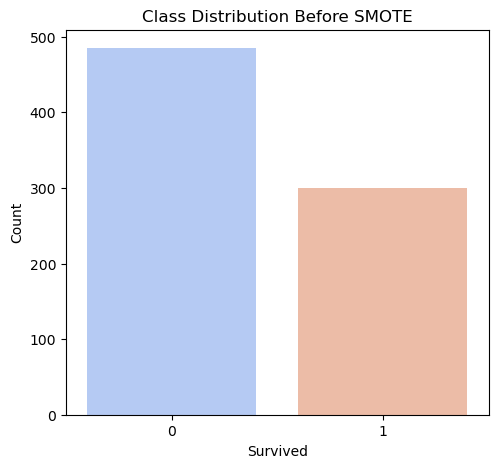

In [28]:
# Plot original class distribution
from collections import Counter
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=list(Counter(y_train).keys()), y=list(Counter(y_train).values()), palette="coolwarm")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Survived")
plt.ylabel("Count")

Now we apply SMOTE:

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

After applying SMOTE, this is what the distribution of survivors looks like:

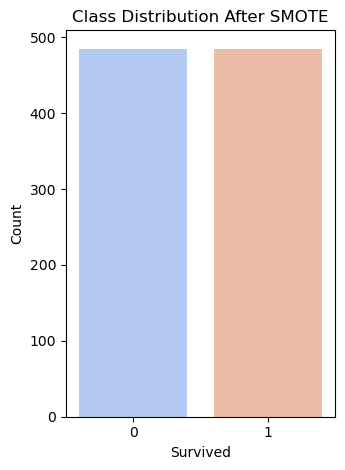

In [31]:
# Plot resampled class distribution
plt.subplot(1, 2, 2)
sns.barplot(x=list(Counter(y_train_resampled).keys()), y=list(Counter(y_train_resampled).values()), palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Survived")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [32]:
y_train_resampled.describe()

count    970.000000
mean       0.500000
std        0.500258
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

The new mean of survival is 0.5 after SMOTE, meaning the class imbalance was fixed

<h2>Task 7: Feature Selection</h2>

Low-variance features carry little useful information for the model. We remove them using VarianceThreshold from sklearn.
For example, if every person in our dataset embarked from the same port, the embarked feature would have near-zero variance.

In [33]:
from sklearn.feature_selection import VarianceThreshold

# Initialize the variance threshold (threshold=0 removes features with 0 variance)
var_thresh = VarianceThreshold(threshold=0.05)  # Set a low threshold

# Apply only on the training data
X_train_selected = var_thresh.fit_transform(X_train_resampled)

# Apply the same transformation on validation and test sets
X_val_selected = var_thresh.transform(X_val)
X_test_selected = var_thresh.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[var_thresh.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['pclass', 'age', 'fare', 'has_cabin', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')


Features that are highly correlated contain redundant information. We keep only one feature from each highly correlated pair. For example, if fare and pclass are highly correlated, keeping both doesn't add extra information.

In [34]:
import numpy as np

# Compute correlation matrix on training data
corr_matrix = X_train_resampled.corr().abs()

# Select only upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify highly correlated features (threshold = 0.85)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop these features from all datasets
X_train_selected = X_train_resampled.drop(columns=to_drop)
X_val_selected = X_val.drop(columns=to_drop)
X_test_selected = X_test.drop(columns=to_drop)

print("Dropped Features:", to_drop)


Dropped Features: []


We eliminate low-variance and highly correlated features after splitting to prevent data leakage and ensure our model generalizes well to unseen data. If we remove features before splitting, we might unknowingly use information from the entire dataset, including validation and test sets, which compromises the fairness of model evaluation. By performing feature selection only on the training data, we mimic real-world scenarios where the model doesn’t have access to future data, ensuring a more robust and reliable model selection process. 

<h2>Task 8: Training a Logistic Regression Model</h2>

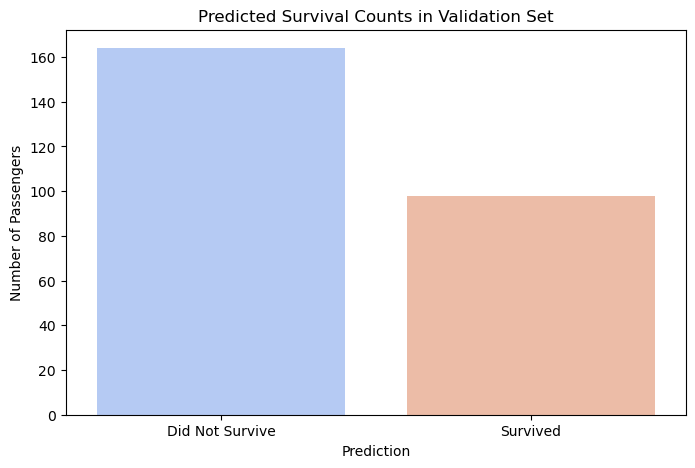

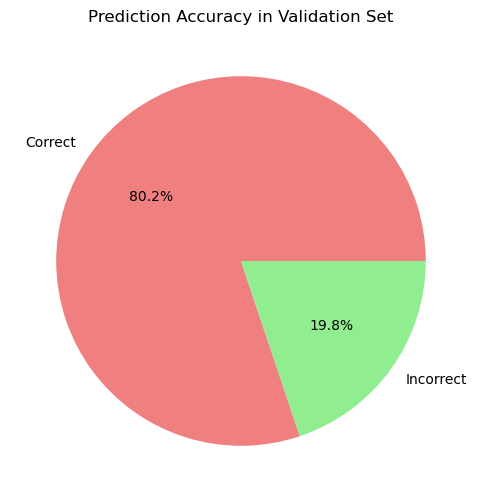

In [35]:
from sklearn.linear_model import LogisticRegression
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_selected, y_train_resampled)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_selected)

#Predict on the test set
y_test_pred = log_reg.predict(X_test_selected)

# Create a DataFrame to compare actual vs predicted values
results_df = pd.DataFrame({"Actual": y_val.values, "Predicted": y_val_pred})
results_df["Result"] = np.where(results_df["Actual"] == results_df["Predicted"], "Correct", "Incorrect")

# Barplot of Predictions**
plt.figure(figsize=(8, 5))
sns.barplot(x=["Did Not Survive", "Survived"], y=[(y_val_pred == 0).sum(), (y_val_pred == 1).sum()], palette="coolwarm")
plt.xlabel("Prediction")
plt.ylabel("Number of Passengers")
plt.title("Predicted Survival Counts in Validation Set")
plt.show()

# Actual vs Predicted Pie Chart**
plt.figure(figsize=(6, 6))
results_df["Result"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightgreen"])
plt.title("Prediction Accuracy in Validation Set")
plt.ylabel("")  
plt.show()

Now we are going to do an analysis of the performance of our model:
First metric will be the accuracy.

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8130


In [37]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=["Did Not Survive", "Survived"]))


Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.87      0.82      0.84       162
       Survived       0.73      0.80      0.77       100

       accuracy                           0.81       262
      macro avg       0.80      0.81      0.80       262
   weighted avg       0.82      0.81      0.81       262



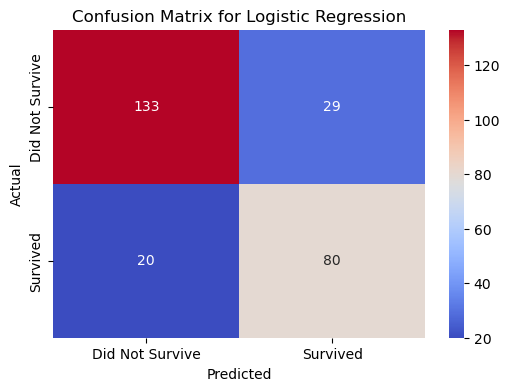

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Did Not Survive", "Survived"], yticklabels=["Did Not Survive", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


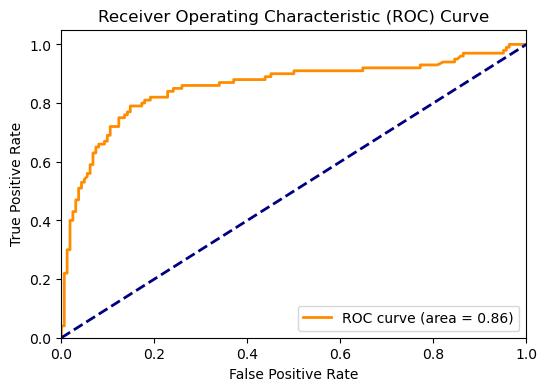

In [39]:
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_test_probs = log_reg.predict_proba(X_test_selected)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Our logistic regression model achieved an accuracy of 81.3%, meaning it correctly predicted survival in about 81% of the test cases. Looking at the classification report, the model has a precision of 87% for "Did Not Survive" and 73% for "Survived", indicating that when it predicts a passenger did not survive, it's right 87% of the time, but it struggles more with survivors. The recall for "Did Not Survive" is 82%, meaning it correctly identifies 82% of actual non-survivors, while for "Survived" it is 80%, showing balanced performance. The confusion matrix confirms this: 133 true negatives (correctly predicted non-survivors), 80 true positives (correctly predicted survivors), but also 29 false positives (people predicted to survive but didn’t) and 20 false negatives (people predicted to not survive but actually did). The ROC curve shows an AUC of 0.86, which is strong, indicating the model does well at distinguishing survivors from non-survivors. Overall, while the model performs well, it tends to misclassify survivors more often, which could be improved by adjusting decision thresholds or using more advanced modeling techniques.